In [28]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# MNIST 데이터 로드 및 전처리
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [29]:
# 레이블 원-핫 인코딩
#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)

In [30]:
# 모델 정의
inputs = Input(shape=(28, 28, 1))
hidden1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
hidden2 = MaxPooling2D(pool_size=(2, 2))(hidden1)
hidden3 = Conv2D(64, kernel_size=(3, 3), activation='relu')(hidden2)
hidden4 = MaxPooling2D(pool_size=(2, 2))(hidden3)
hidden5 = Conv2D(128, kernel_size=(3, 3), activation='relu')(hidden4)
hidden6 = MaxPooling2D(pool_size=(2, 2))(hidden5)
hidden7 = Flatten()(hidden6)
hidden8 = Dropout(0.5)(hidden7)
hidden9 = Dense(128, activation="relu")(hidden8)
output = Dense(10, activation="softmax")(hidden9)

model = Model(inputs=inputs, outputs=output)

In [31]:
# 모델 컴파일
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 요약
model.summary()
# 모델 학습
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6754 - loss: 0.9899 - val_accuracy: 0.9608 - val_loss: 0.1369
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9443 - loss: 0.1911 - val_accuracy: 0.9720 - val_loss: 0.0917
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9574 - loss: 0.1429 - val_accuracy: 0.9793 - val_loss: 0.0710
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9655 - loss: 0.1149 - val_accuracy: 0.9833 - val_loss: 0.0600
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9711 - loss: 0.0968 - val_accuracy: 0.9844 - val_loss: 0.0570


In [32]:
test_loss, test_acc=model.evaluate(test_images, test_labels)
print("테스트 정확도: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9806 - loss: 0.0672
테스트 정확도:  0.9843999743461609


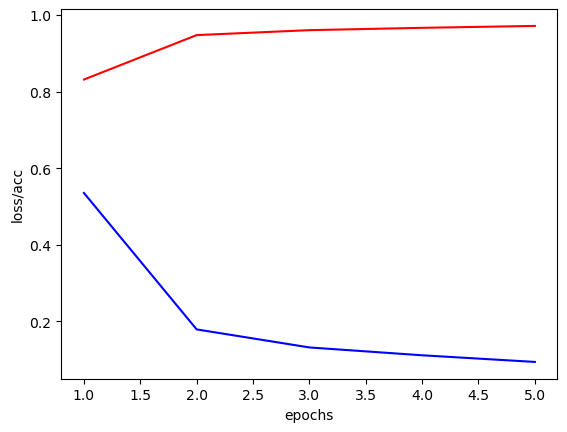

In [33]:
loss=history.history['loss']
acc=history.history['accuracy']
epochs=range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label="Training Loss")
plt.plot(epochs, acc, 'r', label="Accuracy")
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()